# Исследование надежности заемщиков


**Цель исследования**  
Выявить полезные для банка особенности клиента, влияющие на возврат кредита в срок.

**Входные данные**
* данные о клиентах банка (файл `data.csv`)

`children` – количество детей    
`days_employed` –  количество дней, которое проработал клиент  
`dob_years` – возраст клиента  
`education` – образование  
`family_status` – семейный статус  
`family_status_id` – id статуса  
`gender` – пол  
`income_type` – тип дохода   
`debt` – вернул ли клиент заем в срок  
`total_income` – доход клиента  
`purpose` – цель заема  

**Ход исследования**
1. Изучение общей информации о данных
2. Предобработка данных
3. Исследование данных и ответ на поставленные вопросы
4. Общий вывод

**Навыки и инструменты**  

`предобработка данных`  

`Python`  
`Pandas`  
`Plotly`  

**Вывод**  

Наиболее рискованным для банка с точки зрения возврата кредита будет не женатый / не замужний клиент с 4 детьми, с категорией дохода "Е", с целью совершения операций с автомобилем. Но, видимо, в нашем датафрейме нет наблюдений, удовлетворяющих всем этим запросам

## Изучение общей информации о данных

**1. Импорт библиотек. Считывание данных из csv-файла в датафрейм**

In [27]:
import pandas as pd
import plotly.express as px

In [6]:
data = pd.read_csv('/datasets/data.csv')

**2. Выведем первые 20 строчек датафрейма `data` на экран.**

In [7]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**3. Выведем основную информацию о датафрейме.**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**4. Выведем количество пропущенных значений для каждого столбца.**

In [9]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**5. Заменим пропусков в 'income_type' медианным значением**

In [10]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**6. Заменим все отрицательные значения в столбце 'days_employed' положительными с помощью метода `abs()`.**

In [11]:
data['days_employed'] = data['days_employed'].abs()

**7. Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.**

In [12]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получаются аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

**8. Выведем перечень уникальных значений столбца `children`.**

In [13]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**9. В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [14]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**10. Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [15]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**11. Заполним пропуски в столбце `days_employed` медианными значениями по каждму типа занятости `income_type`.**

In [16]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**12. Убедимся, что все пропуски заполнены.**

In [17]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**13. Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [18]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**14. Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.**

In [19]:
data['education'] = data['education'].str.lower()

**15. Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.**

In [20]:
data.duplicated().sum()

71

In [21]:
data = data.drop_duplicates()

### Категоризация данных

**16. На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 назначим категорию `'E'`, а клиенту, получающему 235000, — `'B'`.**

In [22]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [23]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**17. Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [24]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**18. Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` появится строка `'операции с автомобилем'`.**

In [29]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [30]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [ ]:
data['purpose_category']

### Шаг 3. Исследование данных

In [ ]:
def pivot(data, index):
    pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во клиентов', 'Кол-во должников', 'Доля невозврата']
    display(pivot.sort_values('Доля невозврата', ascending = False))
    
    fig = px.bar(pivot, x = index, y = 'Доля невозврата', color = 'Доля невозврата', title = 'Доля невозврата по ' + index)
    fig.show()

pivot(data, 'children')

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Чтобы многократно не писать код с разным количеством условий пройдемся циклом по всем уникальным значениям столбца children и поделим количество тех, у кого нет долгов на тех, у кого они есть. Таким образом получим процентый показатель (применив f строки)

In [ ]:
data = data.rename(columns = {'debt': 'Доля должников, %', \
                              'children': 'Кол-во детей', \
                              'family_status': 'Семейное положение', \
                              'total_income_category': 'Категория дохода', \
                              'purpose_category': 'Цель кредита'})

def debt_ratio(data, index):
    pivot = data.pivot_table(index = index, values = 'Доля должников, %', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во клиентов', 'Кол-во должников', 'Доля невозврата, %']
    pivot['Доля невозврата, %'] = (pivot['Доля невозврата, %'] * 100).round(decimals=2)
    display(pivot.sort_values('Доля невозврата, %', ascending = False))
    
    fig = px.bar(pivot, x = index, y = 'Доля невозврата, %', color = 'Доля невозврата, %', title = 'Доля невозврата по ' + index)
    fig.show()
    
debt_ratio(data, 'Кол-во детей') # применяем функцию, передав в качестве аргумента нужный датафрейм и название столбца

**Проверим по какой причине процент должников, у которых 5 детей так низок**

In [26]:
debt_5 = data.loc[(data['Кол-во детей'] == 5) & (data['Доля должников, %'] == 1)]['Кол-во детей'].count() 
no_debt_5 = data.loc[(data['Кол-во детей'] == 5) & (data['Доля должников, %'] == 0)]['Кол-во детей'].count()
print(debt_5, no_debt_5)

0 9


**Вывод:** 

Среди людей без детей наблюдается наименьший процент должников, что может охрарактеризовать эту категорию как наиболее ответственных заемщиков. Причина нулевого процента должников среди тех, у кого 5 детей же скорее из-за того, что в выборке по фильтру `data.loc[(data['children'] == 5]` всего 9 наблюдений, 0 из которых имеют долги. 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
debt_ratio(data, 'Семейное положение')

,Семейное положение,Кол-во клиентов,Кол-во должников,"Доля невозврата, %"
0,Не женат / не замужем,2796,273,9.76
3,гражданский брак,4134,385,9.31
4,женат / замужем,12261,927,7.56
1,в разводе,1189,84,7.06
2,вдовец / вдова,951,63,6.62


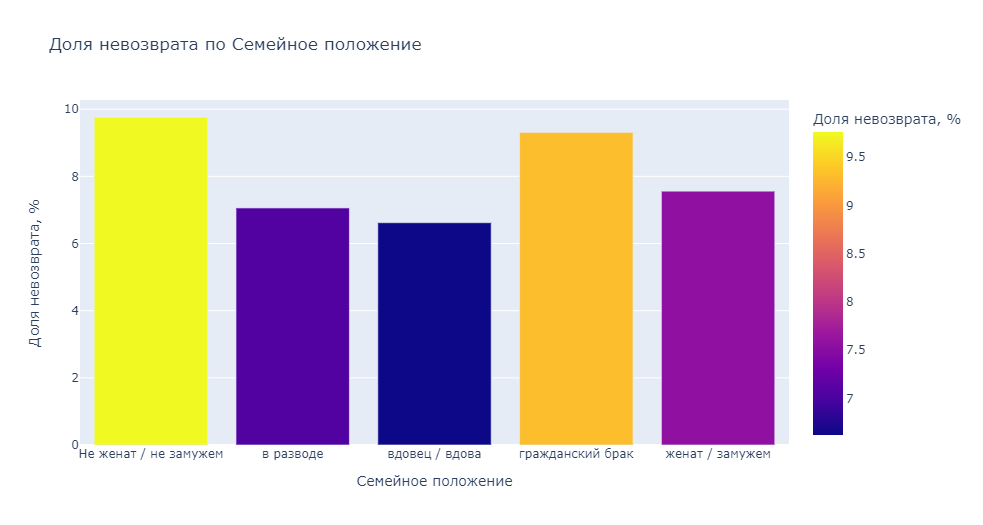

**Вывод:** 

Наибольший процент должников относится к категориям "не женат / не замужем" и "гражданский брак"

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
debt_ratio(data, 'Категория дохода')

,Категория дохода,Кол-во клиентов,Кол-во должников,"Доля невозврата, %"
4,E,22,2,9.09
2,C,15921,1353,8.50
0,A,25,2,8.00
1,B,5014,354,7.06
3,D,349,21,6.02


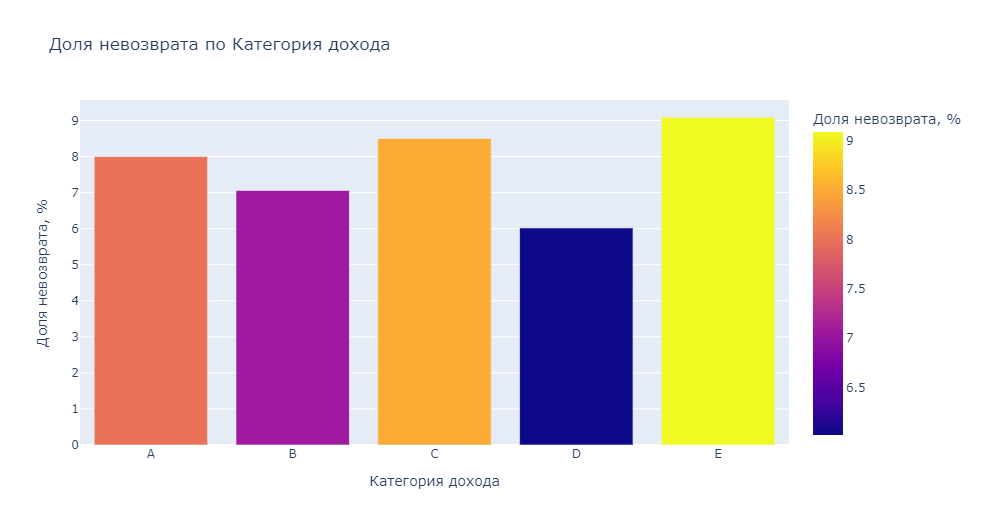

**Вывод:** 

 В одной из самых крупных категорий дохода "В" наблюдается один из самых низких процентов по кредитной задолженности. В категории "С" этот процент выше на 1.5%, что делает эту категорию с одним из самых высоких процентов по задолженностям. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
debt_ratio(data, 'Цель кредита')

,Цель кредита,Кол-во клиентов,Кол-во должников,"Доля невозврата, %"
0,операции с автомобилем,4279,400,9.35
2,получение образования,3988,369,9.25
3,проведение свадьбы,2313,183,7.91
1,операции с недвижимостью,10751,780,7.26


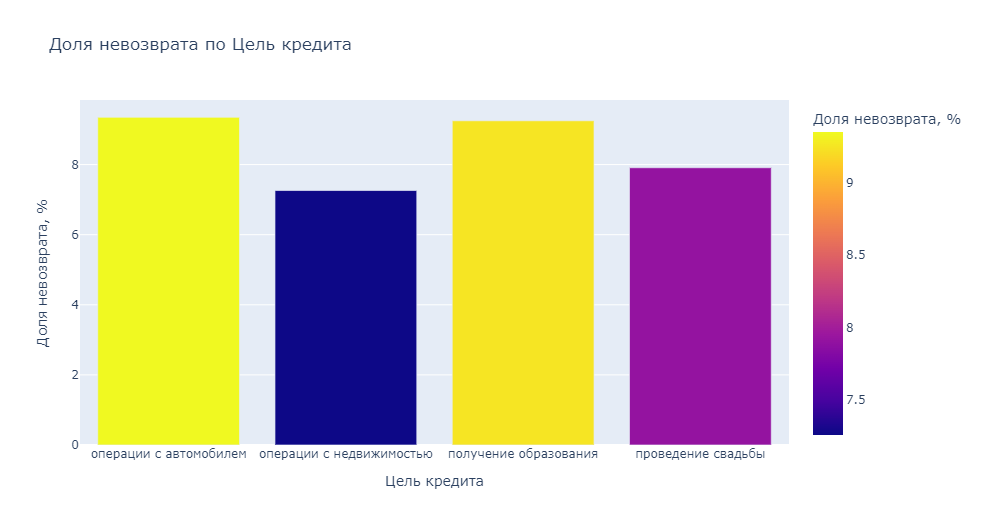

**Вывод:** 

Операции с автомобилем и получение образования - наиболее рискованные, а операции с недвижимостью - наиболее безопасные.

#### 3.5 Возможные причины появления пропусков в исходных данных.

 Возможны два основных фактора пропусков в исходных данных: человеческий и технический.   
**Человеческий**: клиенты могли не предоставлять данные, либо данная информация не требовалась в каких-то случаях.   
**Технический**: На этапе загрузки/выгрузки данных; неверно составленный запрос либо объединение таблиц. 


#### 3.6 Почему заполнить пропуски медианным значением лучшее решение для количественных переменных?

Медианное значение не так чувствительно к "выбросам" и является более подходящей мерой, чем "среднее", а следовательно показывает более явную и правдоподобную картину о столбце данных, к которому применяется. Рассмотрим пример на списке дат постройки зданий: 

In [30]:
import statistics as stat
building_year = [1820, 2001, 2010, 1998, 2005]
print(stat.mean(building_year))
print(stat.median(building_year))

1966.8
2001


При подсчете среднего всего одно старое здание "состарило" все наши здания на 34 года по сравнению с медианным значением

### Шаг 4: общий вывод.

Наиболее рискованным для банка с точки зрения возврата кредита будет не женатый / не замужний клиент с 4 детьми, с категорией дохода "Е", с целью совершения операций с автомобилем. 
Но, видимо, в нашем датафрейме нет наблюдений, удовлетворяющих всем этим запросам:

In [31]:
data.loc[(data['Семейное положение'] == 'Не женат / не замужем') & \
                      (data['Цель кредита'] == 'операции с автомобилем') & \
                      (data['Кол-во детей'] == 4) & \
                      (data['Категория дохода'] == 'E')]

,Кол-во детей,days_employed,dob_years,education,education_id,Семейное положение,family_status_id,gender,income_type,"Доля должников, %",total_income,purpose,Категория дохода,Цель кредита
